In [ ]:
from cs103 import *


# CPSC 103 - Systematic Program Design
# Module 07a Day 2
Rik Blok, with thanks to Prof. Giulia Toti

---

# Reminders

- Mon 9am: Final exam accommodation request
  - Only for exam hardship, exam clash, or religious observations
  - See [Piazza post @529](https://piazza.com/class/lcffuogkn352gx/post/529) for details
- Tue: Module 5 (Arbitrary sized): Tutorial Resubmission
- Fri Mar 31: ⚠️ [Project Milestone](https://canvas.ubc.ca/courses/123409/assignments/1425107)

Note that office hours and Piazza will get busy so stay ahead of the curve!

See also the [course calendar](https://canvas.ubc.ca/calendar?include_contexts=course_123409) (**[v.gd/auFASV](https://v.gd/auFASV)**).

---

# How to Design Analysis Programs (HtDAP)

The steps in the HtDAP recipe are: 
1. Planning
<ol style="list-style-type:lower-alpha">
    <li>Identify the information in the file your program will read.</li>
    <li>Write a description of what your program will produce.</li>
    <li>Write or draw examples of what your program will produce.</li>
</ol>
2. Building the program
<ol style="list-style-type:lower-alpha">
    <li>Design data definitions.</li>
    <li>Design a function to read the information and store it as data in your program.</li>
    <li>Design functions to analyze the data.</li>
</ol>

---

# Example: Analysing VPD Crime Data

## Step 1: Planning - **Highlights**

### Step 1a: Identify the info your program will read

<font color="blue">
    
- TYPE: The type of crime activities.  One of
  - BNE Commercial
  - BNE Residential/Other
  - Theft of Vehicle
  - Theft of Bicycle
- HOUR,MINUTE: when the reported crime activity occurred
  - HOUR: A two-digit field that indicates the hour time (in 24 hours format)
  - MINUTE: A two-digit field that indicates the minute
  - **Note: Some crimes may not contain time information.**

</font>

### Step 1b: Write a description of what your program will produce

<font color="blue">
    
- Given a type of crime, find the time of day (hour) with the highest frequency
    
OR
    
- Graph of crimes committed in each hour, maybe show different types overlaid in different colours

</font>

### Step 1c: Write or draw examples of what your program will produce

<font color="blue">
    
```python
expect(main('crime_data_file.csv', CrimeType.BEC), 8)
```

OR
    
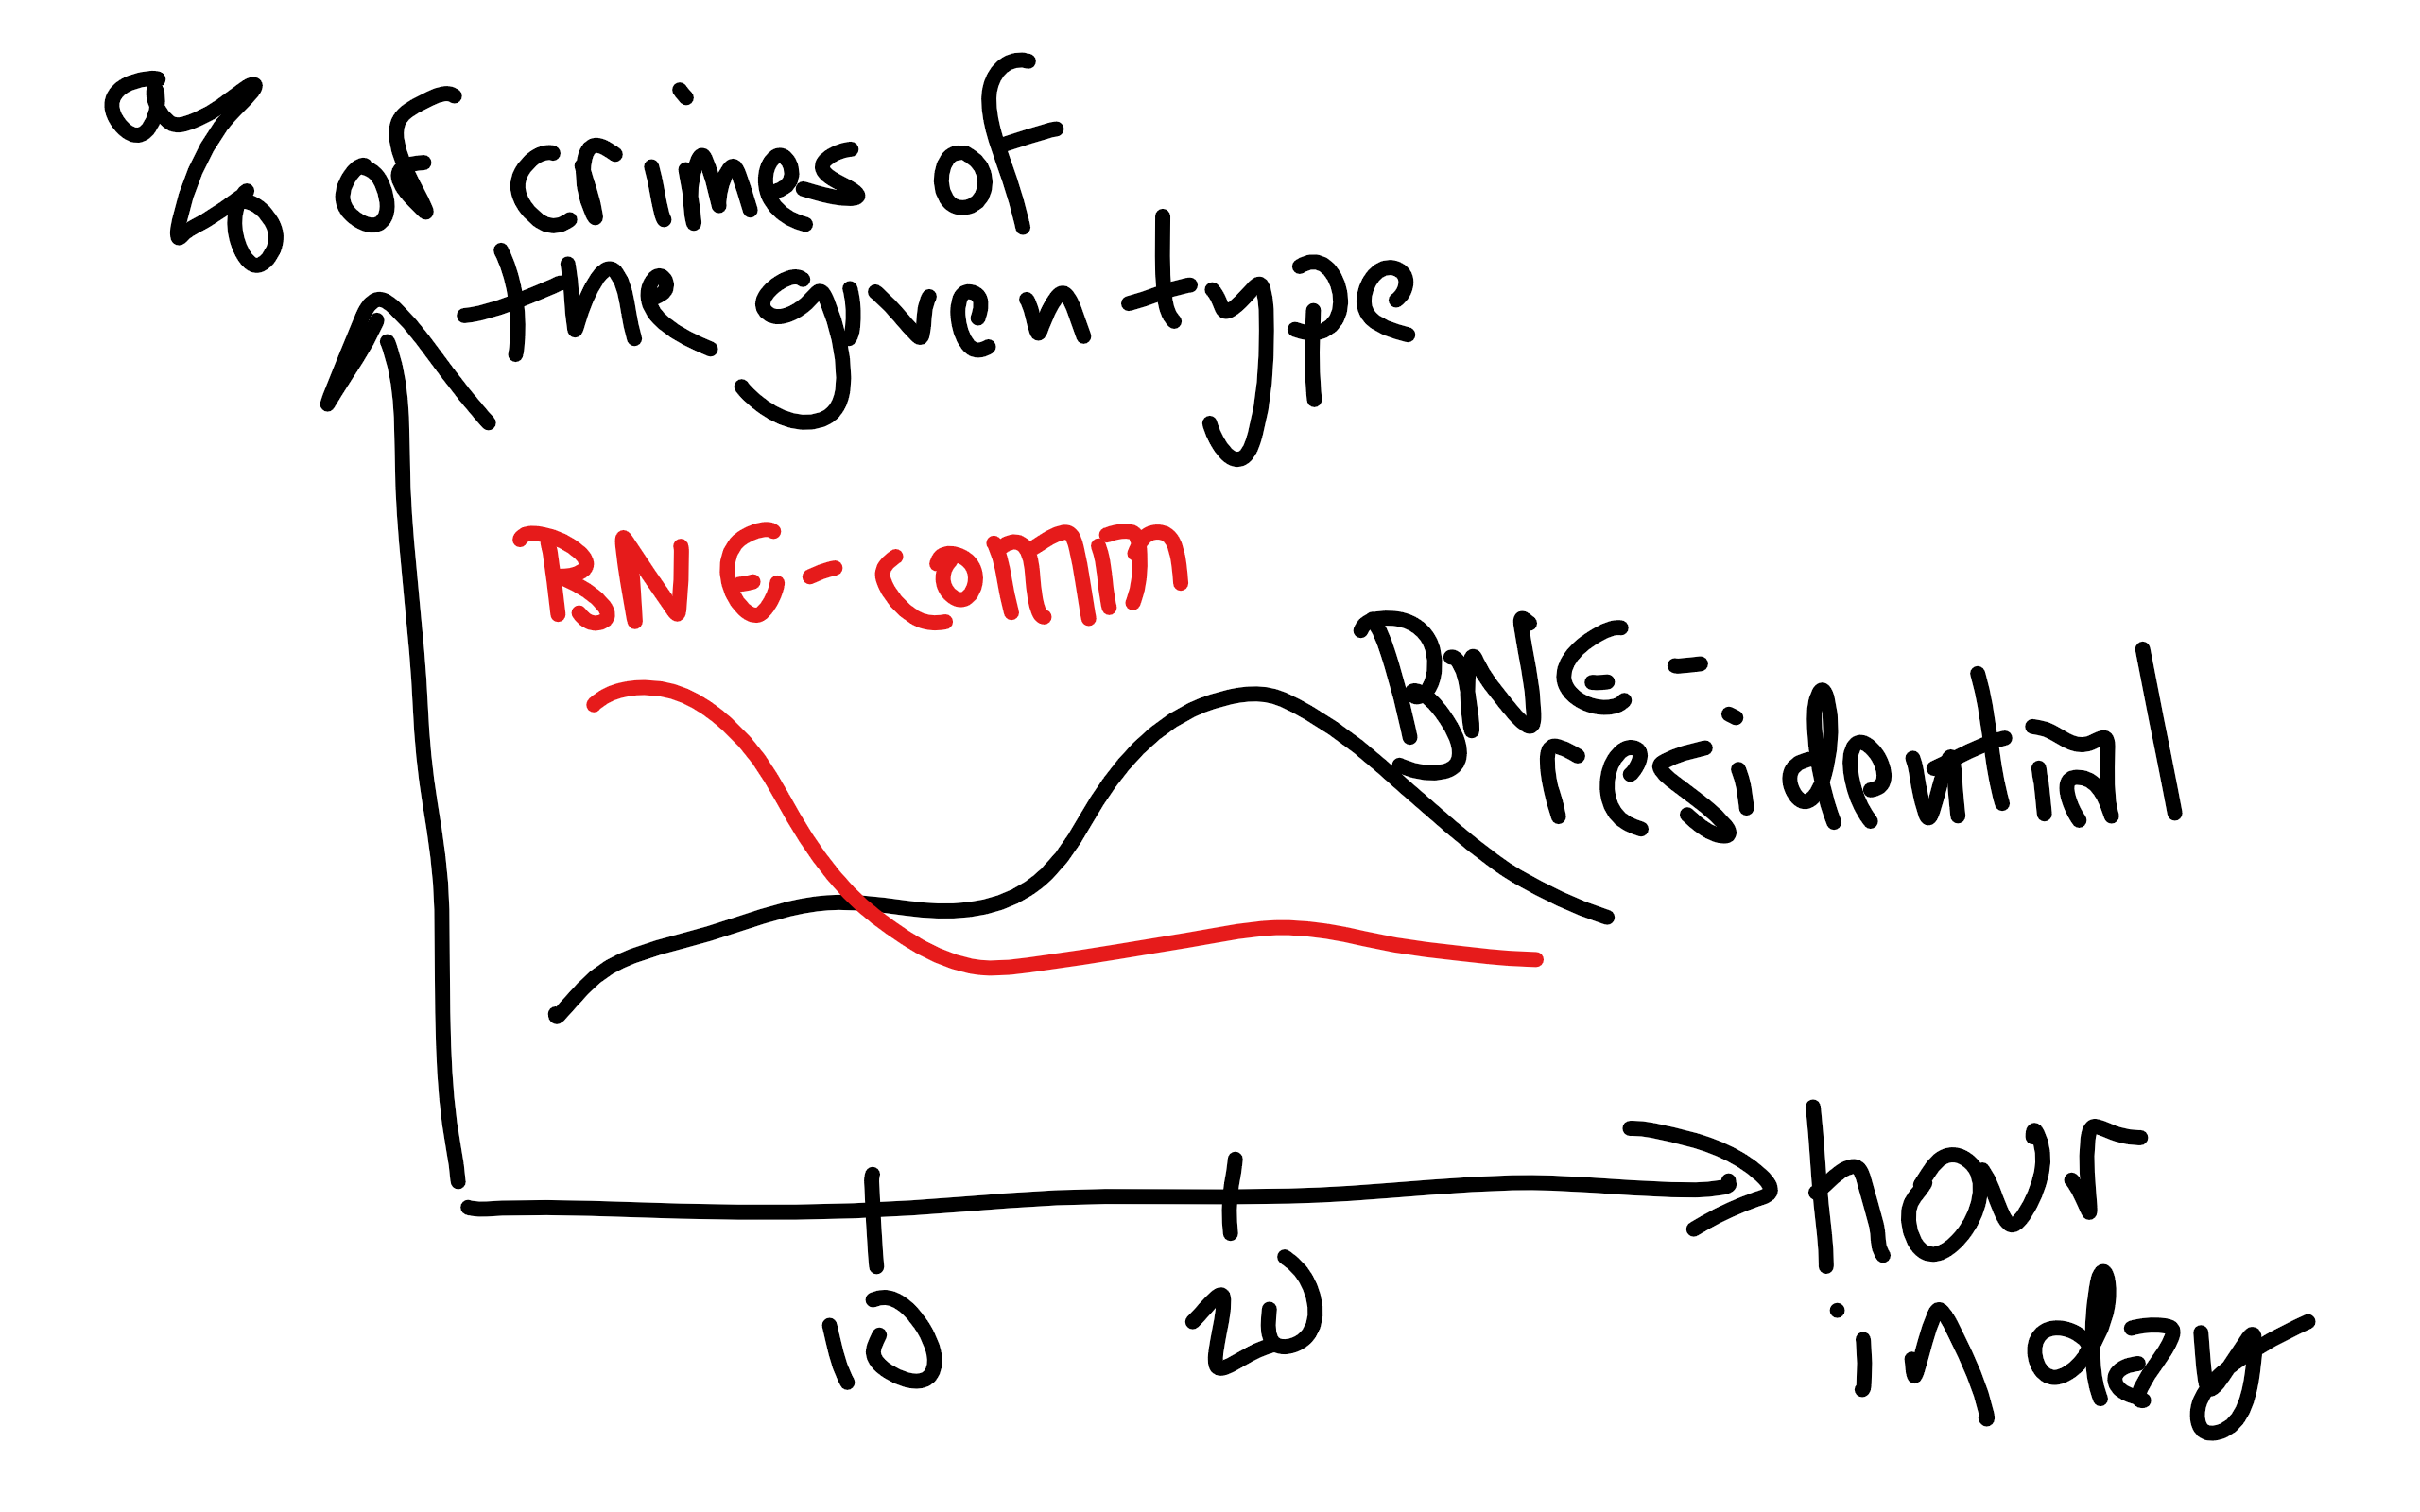

</font>

---

# Step 2a: Building

Design data definitions:
- You should design data that your program is going to use. 
- You should focus only on the fields/columns that your program is going to use and choose the correct type for each one. 
- If you choose a non-primitive (interval, enumeration, optional...) you have to design it. 
- Create a compound data to represent one line of data on the CSV file (`Consumed`). 
- Create a list from this compound data to represent all lines of data in the CSV file (`List[Consumed]`). 
- You may need more data definitions that can be added later (for example, `List[int]` or `List[str]`).

---

### Step 2a: Building - Example
#### Document which information you will represent in your data definitions

Before you design data definitions in the code cell below, you must explicitly document here which information in the file you chose to represent and why that information is crucial to the *chart or graph* that you'll produce when you complete step 2c.
 
<div class="alert alert-success">
    
✅ For this example, we'll skip the "chart or graph" part and design our program to produce a numerical quantity, instead (a particular hour of the day).
    
</div>

<font color="blue">
    
Put your answer here. Please don't delete the two HTML tags on either end of this paragraph. It's to make your answer blue so the TAs can easily spot it.

</font>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>
   
**Which information you chose to represent:**
    
We are only interested in the Type and Hour columns.  Type can be represented as an Enum (4 cases) and Hour as an integer interval [0,23].
    
We also need the Minute column to check if the time data is reliable but we don't need to store it.  

---

#### Design data definitions

In [ ]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

Consumed = ...



# List[Consumed]
# interp. a list of Consumed

LOC0 = []

@typecheck
def fn_for_loc(loc: List[Consumed]) -> ...:
    ... # choose which template body to use for List[Consumed]


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>

**Data definitions:**
```python
from cs103 import *
from enum import Enum
from typing import NamedTuple, List
import csv

##################
# Data Definitions


CrimeType = Enum('CrimeType', ['BEC', 'BER', 'TV', 'TB'])
# interp. A type of crime in our file.  One of:
#   Break-and-enter Commercial (BEC),
#   Break-and-enter Residential (BER),
#   Theft of vehicle (TV), or
#   Theft of bicycle (TB).

# examples redundant for enumeration

# template based on Enumeration (4 cases)
@typecheck
def fn_for_crime_type(ct: CrimeType) -> ...:
    if ct == BEC:
        return ...
    elif ct == BER:
        return ...
    elif ct == TV:
        return ...
    elif ct == TB:
        return ...
    

CrimeData = NamedTuple('CrimeData', [('type', CrimeType),
                                     ('hour', int)]) # in range [0,23]
# interp. Information about a crime, including the type of crime and hour of the day
# in the range [0,23] that the crime occurred

CD0 = CrimeData(CrimeType.BEC, 0)
CD1 = CrimeData(CrimeType.BER, 1)
CD2 = CrimeData(CrimeType.TV, 13)
CD3 = CrimeData(CrimeType.TB, 23)

# template based on Compound (2 fields) and reference rule
@typecheck
def fn_for_crime_data(cd: CrimeData) -> ...:
    return ...(fn_for_crime_type(cd.type), cd.hour)


# List[CrimeData]
# interp. a list of CrimeData

LOCD0 = []
LOCD1 = [CD0]
LOCD2 = [CD0, CD1]
LOCD3 = [CD0, CD1, CD2, CD3]

# template based on Arbitrary-sized and reference rule
@typecheck
def fn_for_locd(locd: List[CrimeData]) -> ...:
    # description of the accumulator
    acc = ...      # type: ...
    for cd in locd:
        acc = ...(fn_for_crime_data(cd), acc)

    return ...(acc)
```
    
</details>

---

# Step 2b: Building

Design a function to read the information and store it as data in your program:
- You should complete the `read` function from its template. 
- Change the `Consumed` type name.
- Check what columns from the file you need.
- Check if the types needs parsing (changing the representation on the computer). All values in the CSV file are represented as strings when read. 
- You can also add any other helper function you need (e.g. to remove rows with missing/invalid data).
- You should create at least two small CSV files for testing, so you can be sure your function is working before using it on full datasets. 

<div class="alert alert-warning">
    
⚠️ You may skip irrelevant columns and rows with missing/invalid data when reading.  But **don't remove any other rows**.  (E.g., don't filter for a specific CrimeType here.)  That's part of the chosen analysis and should be handled later.  At this point we want to read **all** valid, relevant data.
    
</div>

---

# Reading rows from the CSV

From the HtDAP template:
```python
@typecheck
def read(filename: str) -> List[Consumed]:
    ...
    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the strings in the 
            # current row, and you may need to convert some
            # of the strings to other types
            c = Consumed(row[0], ... ,row[n])
        ...
```

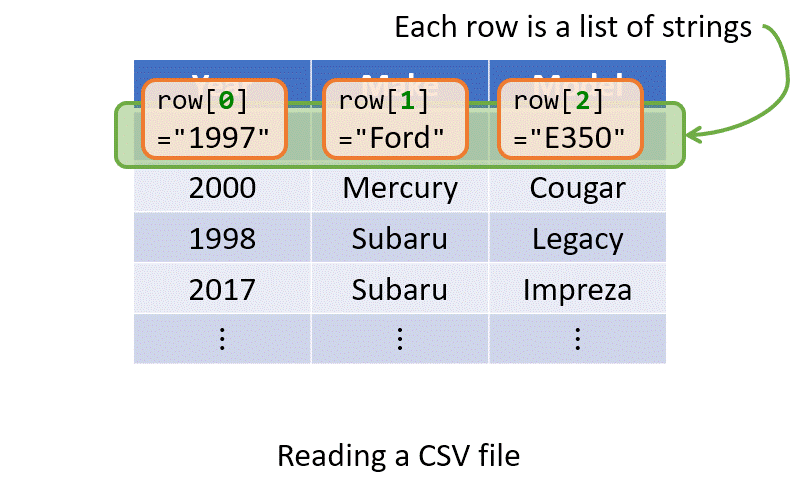

<div class="alert alert-warning">
    
⚠️ Note that `row[n]` represents the **nᵗʰ string in the current row**, not the nᵗʰ row!
    
</div>
            
---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Which strings in `row`?

Open the [crimedata file](https://www.students.cs.ubc.ca/~cs-103/redirect/?target=module-7-htdap/Lecture/Rik/crimedata) and have a look at the data.  Which strings in `row` will represent the type of crime and the hour, respectively?
<ol style="list-style-type:upper-alpha">
    <li><code>row[0]</code> and <code>row[1]</code></li>
    <li><code>row[1]</code> and <code>row[2]</code></li>
    <li><code>row[0]</code> and <code>row[4]</code></li>
    <li><code>row[1]</code> and <code>row[5]</code></li>
    <li><code>row[5]</code> and <code>row[1]</code></li>
</ol>
 

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Remember, that Python uses zero-indexing for lists.  And note that your program collects *ALL* the strings in the current line into the variable `row`.  It doesn't know to filter out the irrelevant data yet.
    
</details>

---

# Parsing a `row`

The CSV reader will represent all items in a row as strings.  We need that data to be *parsed* (converted) into the data types we're using.  For example, for our crime data we want the hour to be stored as an integer.

The cs103 library contains two functions to parse data into integers and floats.  From their help (e.g., `help(parse_int)`):
- `parse_int(s: str) -> Optional[int]` return `s` as an integer, if possible; returns `None` if `s` is not an integer
- `parse_float(s: str) -> Optional[float]` return `s` as a float, if possible; returns `None` if `s` is not a float

### Parsing non-primitive data

For other, non-primitive data, you need to create your own `parse_my_data_type` helper function that converts a string into an instance of your data type.

### Example

If `Consumed` was a compound containing a string, integer, float, and `CrimeType` then our `for` loop would look like:
```python
        for row in reader:
            c = Consumed(row[0], parse_int(row[1]), parse_float(row[2]), parse_crime_type(row[3]))
            loc.append(c)
```

---

<img style="float: right; width:10%" src="https://lthub.ubc.ca/files/2020/07/iClicker-Cloud-Logo.png">

# iClicker question: Creating an instance from a row


<div style="float: right; width: 40%">
    
| Name |  GPA  |  StID |
|:----:|:-----:|:-----:|
| Jane Doe | 3.9 | 12345678 |
|  ⋮   |  ⋮   |  ⋮   |

</div>

We're trying to read the CSV file on the right into this data definition:
```python
Student = NamedTuple('Student', 
                     [('name', str),
                      ('id', int),
                      ('gpa', float)]
```

We've written the following code to loop through the CSV file:
```python
        for row in reader:
            s = ...
            los.append(s)
```
 
Which of the following correctly fills in the missing expression (replacing the `...` ellipsis) to create an instance of `Student`?
<ol style="list-style-type:upper-alpha">
    <li><code>Student(row[0], parse_int(row[2]), parse_float(row[1]))</code></li>
    <li><code>Student(row[0], parse_float(row[2]), parse_int(row[1]))</code></li>
    <li><code>Student(row[0], parse_int(row[1]), parse_float(row[2]))</code></li>
    <li><code>Student(row[0], parse_float(row[1]), parse_int(row[2]))</code></li>
</ol>

<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Hint (for your review after class)</summary>
    
Notice the order the data is stored in the CSV file.  Compare that to the order it's represented with our `Student` data type.
    
</details>

---

### Step 2b: Building - Example
#### Design a function to read the information and store it as data in your program

In [ ]:
@typecheck
def read(filename: str) -> List[Consumed]:
    """    
    reads information from the specified file and returns ...
    """
    #return []  #stub
    # Template from HtDAP
    # loc contains the result so far
    loc = [] # type: List[Consumed]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the strings in the 
            # current row, and you may need to convert some
            # of the strings to other types
            c = Consumed(row[0], ... ,row[n])
            loc.append(c)
    
    return loc


start_testing()

# Examples and tests for read
expect(..., ...)

summary()


<details class="alert alert-info"><summary style="cursor:pointer; display:list-item">ℹ️ Sample solution (For later.  Don't peek if you want to learn 🙂)</summary>

**Data definitions:**
```python
@typecheck
def read(filename: str) -> List[CrimeData]:
    """    
    Reads information from the specified file and returns a list 
    of crime data.
    
    Ignores lines where both the hour and the minute are zero.
    """
    # return []  #stub
    # Template from HtDAP
    # locd contains the result so far
    locd = [] # type: List[CrimeData]

    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line

        for row in reader:
            # you may not need to store all the strings in the 
            # current row, and you may need to convert some
            # of the strings to other types
            if is_reliable(row):
                cd = CrimeData(parse_crime_type(row[0]), 
                               parse_int(row[4]))
                locd.append(cd)
    
    return locd


@typecheck
def is_reliable(los: List[str]) -> bool:
    """
    Returns True if none of the pertinent data in los is missing,
    otherwise returns False.
    
    Missing data is indicated by a "0" in both items 4 and 5
    of the list.
    """
    # return True # stub
    
    # no template used
    return los[4] != "0" or los[5] != "0"


start_testing()

# Examples and tests for read
expect(read('testfile_empty.csv'), [])
expect(read('testfile_all_missing.csv'), [])
expect(read('testfile_all_bec.csv'), TEST_ALL_BEC)
expect(read('testfile_all_ber.csv'), TEST_ALL_BER)

summary()


start_testing()

# Examples and tests for is_reliable
expect(is_reliable(["0", "0", "0", "0", "1", "0"]), True)
expect(is_reliable(["0", "0", "0", "0", "0", "1"]), True)
expect(is_reliable(["1", "1", "1", "1", "0", "0"]), False)

summary()
```
    
</details>

---

# Tests

Don't use the original CSV file to test your program.  Otherwise you have to know the expected output before you've finished designing the program.  (Isn't this what the program is for? 😉)

Instead, create special test files that contain a subset of the data.  Choose the subsets so that:
1. They cover a wide range of data,
2. They cover special cases and edge cases,
3. They deliberately include some missing/invalid data that you think the program should be able to handle,
3. It's easy to determine what the expected output should be.

Small files are fine!  You might also want one or two tests with larger subsets.

Give the test files names that help you remember what they're testing.  Feel free to construct artificial data or sample from the original CSV file.

<div class="alert alert-info">
   
ℹ️ Don't forget to submit all your test files with your program!
    
</div>

---

# Appendix: Parsing `CrimeType` with `parse_crime_type`

Here's the helper function `parse_crime_type` to parse a string into a `CrimeType`.  It was designed using our good old HtDF recipe.  (The function wasn't designed in class because we're all familiar with the recipe by now 🙂  We just need to run this cell.)

Notice that this function takes a string as input, not a `CrimeType`.  (That's the *output*!)

In [ ]:
@typecheck
def parse_crime_type(s:str) -> CrimeType:
    """
    Returns the string s as a CrimeType.
    
    Assumes s is one of the following:
        "Break and Enter Commercial"
        "Break and Enter Residential/Other"
        "Theft of Bicycle"
        "Theft of Vehicle"
    """
    # return CrimeType.BEC # stub
    # template from atomic non-distinct
    # return ...(s)
    if s == "Break and Enter Commercial":
        return CrimeType.BEC
    elif s == "Break and Enter Residential/Other":
        return CrimeType.BER
    elif s == "Theft of Bicycle":
        return CrimeType.TB
    elif s == "Theft of Vehicle":
        return CrimeType.TV
    
    
start_testing()

expect(parse_crime_type("Break and Enter Commercial"), CrimeType.BEC)
expect(parse_crime_type("Break and Enter Residential/Other"), CrimeType.BER)
expect(parse_crime_type("Theft of Bicycle"), CrimeType.TB)
expect(parse_crime_type("Theft of Vehicle"), CrimeType.TV)

summary()


# Appendix: Parsed test data

Here are the test files parsed into `List[CrimeData]`.  I've included this info here so we can quickly add it as needed to our examples.


In [ ]:
TEST_ALL_MISSING = [CrimeData(CrimeType.BEC, 0),
                    CrimeData(CrimeType.BER, 0),
                    CrimeData(CrimeType.TB, 0),
                    CrimeData(CrimeType.TV, 0)]

TEST_ALL_BEC = [CrimeData(CrimeType.BEC, 6),
                CrimeData(CrimeType.BEC, 18)] # missing data removed

TEST_ALL_BER = [CrimeData(CrimeType.BER, 21),
                CrimeData(CrimeType.BER, 17),
                CrimeData(CrimeType.BER, 0)]

TEST_ALL_TB = [CrimeData(CrimeType.TB, 1),
               CrimeData(CrimeType.TB, 23),
               CrimeData(CrimeType.TB, 17)]

TEST_ALL_TV = [CrimeData(CrimeType.TV, 23),
               CrimeData(CrimeType.TV, 14),
               CrimeData(CrimeType.TV, 21)]
